# Projet data_management

In [30]:
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import scipy.stats
import statistics
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns; sns.set_theme()
import warnings
import numpy as np
#import pandas_profiling as pp
from pandas_profiling import ProfileReport
%matplotlib inline
import os
warnings.filterwarnings('ignore')

# Partie 1 : Importation de la base de données.

In [31]:
DF=pd.read_excel('du-vert-pres-de-chez-moi.xltx')
print(DF.shape)
DF.head()

(1605, 10)


,Geo_Point,Geo_Shape,Arrondissement,Adresse,Proposition_non_réalisable,Type_de_végétalisation,Etat_de_la_proposition,Numéro,Commentaitre_accompagnant_la_proposition,Avancement_du_projet
0,"48.8692119999, 2.3490870004","{""type"": ""Point"", ""coordinates"": [2.3490870004...",75002,20 Rue Beauregard,la proposition n'a pas été retenue car aucun m...,Mur végétalisé,Propositions non réalisables techniquement,S2014G4006,pas de commentaires,-
1,"48.8689618665, 2.37427555936","{""type"": ""Point"", ""coordinates"": [2.3742755593...",75011,161 rue saint maur,-,Végétalisation pied arbre,proposition réalisable et retenue dans les 200...,S2014I1623,-,Réalisé
2,"48.8690699999, 2.35324000067","{""type"": ""Point"", ""coordinates"": [2.3532400006...",75002,Rue Sainte-Apolline,la proposition n'a pas été retenue car le trot...,Plantation d?arbre,Propositions non réalisables techniquement,S2014H741,Un peu de verdure,-
3,"48.8751099999, 2.34304600043","{""type"": ""Point"", ""coordinates"": [2.3430460004...",75009,9 Rue Cadet,la proposition n'a pas été retenue car elle co...,Autre proposition,Propositions non réalisables techniquement,S2014I4326,Dans le cadre de la campagne du vert près de c...,-
4,"48.8761280001, 2.35524799995","{""type"": ""Point"", ""coordinates"": [2.3552479999...",75010,5 Cour de la Ferme Saint-Lazare,la proposition n'a pas été retenue car l'espac...,Jardinière en pleine terre,Propositions non réalisables techniquement,S2014G2842,Un pry de verdure . Car il en manque. La dispo...,-


# Partie 2 : Décrire les données en utilisant des méthodes statistiques.

In [32]:
#Description des variables catégorielles 
DF.describe(include='O')


,Geo_Point,Geo_Shape,Adresse,Proposition_non_réalisable,Type_de_végétalisation,Etat_de_la_proposition,Numéro,Commentaitre_accompagnant_la_proposition,Avancement_du_projet
count,1605,1605,1599,1601,1602,1604,1565,1603,1605
unique,1374,1374,1452,25,27,3,1558,736,5
top,"-90.0, -59.0169768948","{""type"": ""Point"", ""coordinates"": [-59.01697689...",19 Rue Alphonse Baudin,-,Mur végétalisé,Propositions non réalisables techniquement,Urnes MA,-,-
freq,43,43,11,510,496,1093,3,510,1396


In [33]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Geo_Point                                 1605 non-null   object
 1   Geo_Shape                                 1605 non-null   object
 2   Arrondissement                            1605 non-null   int64 
 3   Adresse                                   1599 non-null   object
 4   Proposition_non_réalisable                1601 non-null   object
 5   Type_de_végétalisation                    1602 non-null   object
 6   Etat_de_la_proposition                    1604 non-null   object
 7   Numéro                                    1565 non-null   object
 8   Commentaitre_accompagnant_la_proposition  1603 non-null   object
 9   Avancement_du_projet                      1605 non-null   object
dtypes: int64(1), object(9)
memory usage: 125.5+ KB


In [34]:
DF.dtypes

Geo_Point                                   object
Geo_Shape                                   object
Arrondissement                               int64
Adresse                                     object
Proposition_non_réalisable                  object
Type_de_végétalisation                      object
Etat_de_la_proposition                      object
Numéro                                      object
Commentaitre_accompagnant_la_proposition    object
Avancement_du_projet                        object
dtype: object

In [35]:
DF.isnull().sum()

Geo_Point                                    0
Geo_Shape                                    0
Arrondissement                               0
Adresse                                      6
Proposition_non_réalisable                   4
Type_de_végétalisation                       3
Etat_de_la_proposition                       1
Numéro                                      40
Commentaitre_accompagnant_la_proposition     2
Avancement_du_projet                         0
dtype: int64

In [36]:
DF.duplicated().sum() # Aucun doublon 

0

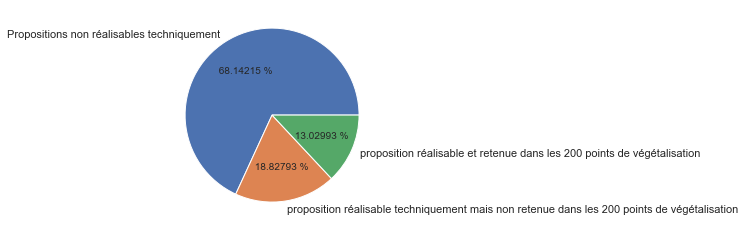

In [37]:
#visualisation a partir plt.pie

Proposition_values = DF['Etat_de_la_proposition'].value_counts().values
Proposition_keys = DF['Etat_de_la_proposition'].value_counts().keys()
plt.pie (Proposition_values, labels = Proposition_keys, autopct = '% 1.5f %%')
plt.show()

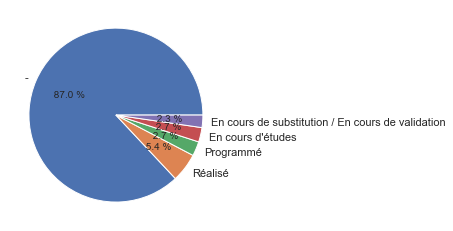

In [38]:
avancement_values = DF['Avancement_du_projet'].value_counts().values
avancement_keys = DF['Avancement_du_projet'].value_counts().keys()
plt.pie (avancement_values, labels = avancement_keys, autopct = '% 1.1f %%')
plt.show()

<AxesSubplot:>

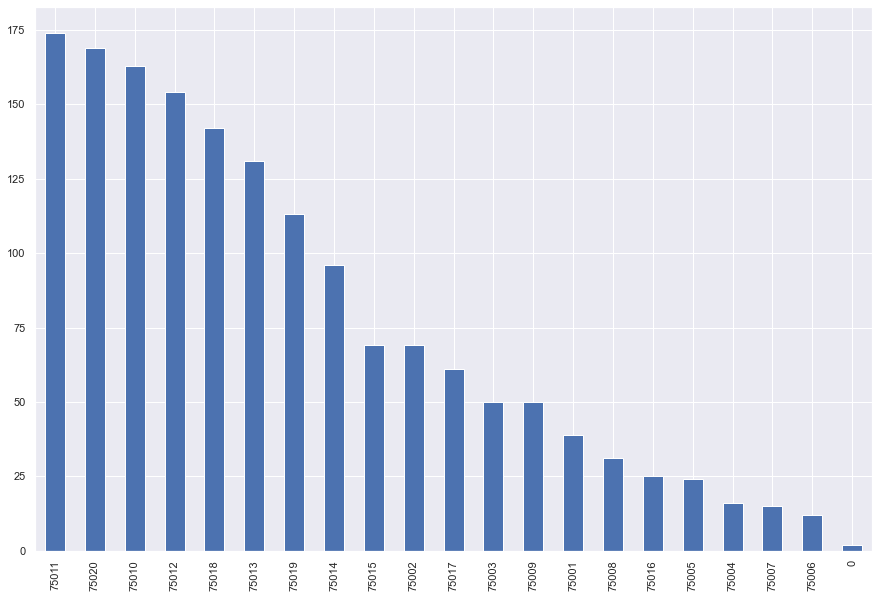

In [39]:
plt.rcParams["figure.figsize"] = (15,10)
DF['Arrondissement'].value_counts().plot.bar()

<AxesSubplot:>

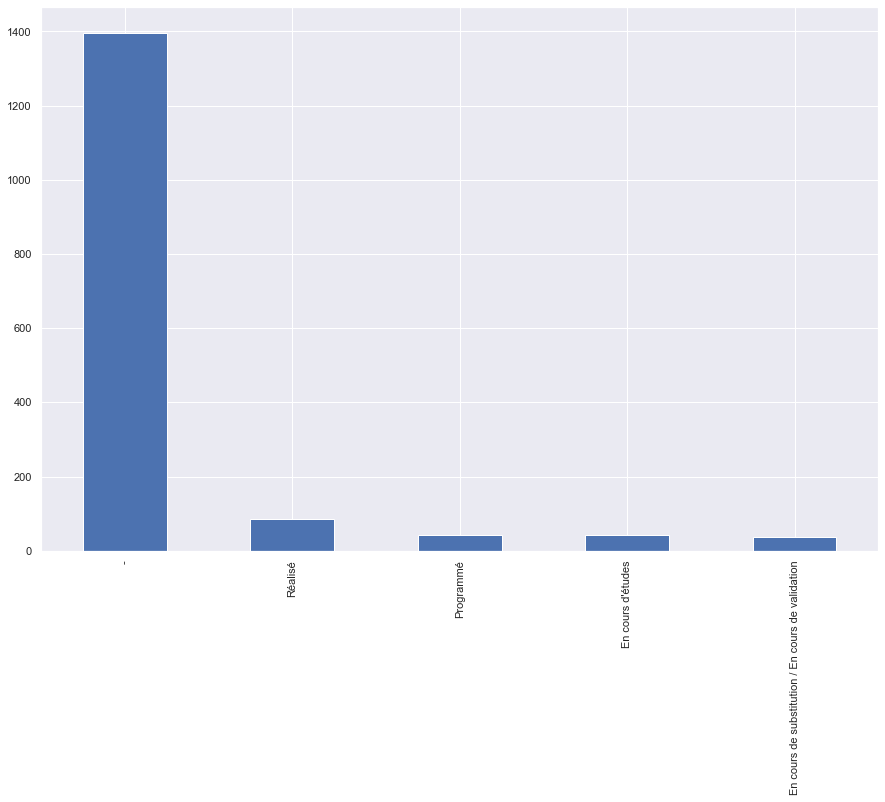

In [40]:
plt.rcParams["figure.figsize"] = (15,10)
DF['Avancement_du_projet'].value_counts().plot.bar()

In [59]:
# Suppression des variables "Geo point","Geo shape" et "Numéro de projet" car ils représentent autant d'informations que la variable "Adresse"
# Suppression de la variable "Avancement du projet" car elle constitue une autre variable expliquée. 
DF1 = DF.drop(["Geo_Point","Geo_Shape","Numéro","Adresse","Commentaitre_accompagnant_la_proposition"], axis=1)
DF1.head()

,Arrondissement,Proposition_non_réalisable,Type_de_végétalisation,Etat_de_la_proposition,Avancement_du_projet
0,75002,la proposition n'a pas été retenue car aucun m...,Mur végétalisé,Propositions non réalisables techniquement,-
1,75011,-,Végétalisation pied arbre,proposition réalisable et retenue dans les 200...,Réalisé
2,75002,la proposition n'a pas été retenue car le trot...,Plantation d?arbre,Propositions non réalisables techniquement,-
3,75009,la proposition n'a pas été retenue car elle co...,Autre proposition,Propositions non réalisables techniquement,-
4,75010,la proposition n'a pas été retenue car l'espac...,Jardinière en pleine terre,Propositions non réalisables techniquement,-


In [42]:
DF2=DF1.dropna(subset = ['Proposition_non_réalisable', 'Type_de_végétalisation', 'Etat_de_la_proposition','Adresse',]) 
print(DF2.shape)
DF2.head()
# lES NaN de "proposition_non-réalisable", "Type_de_végétalisation" et"Etat_de_la_proposition" se trouvent sur les mêmes lignes. Elles concerenent 4 modalités sur 1604, nous avons décidé de les supprimer puisqu'elles ne sont pas significatives. 

(1596, 6)


,Arrondissement,Adresse,Proposition_non_réalisable,Type_de_végétalisation,Etat_de_la_proposition,Commentaitre_accompagnant_la_proposition
0,75002,20 Rue Beauregard,la proposition n'a pas été retenue car aucun m...,Mur végétalisé,Propositions non réalisables techniquement,pas de commentaires
1,75011,161 rue saint maur,-,Végétalisation pied arbre,proposition réalisable et retenue dans les 200...,-
2,75002,Rue Sainte-Apolline,la proposition n'a pas été retenue car le trot...,Plantation d?arbre,Propositions non réalisables techniquement,Un peu de verdure
3,75009,9 Rue Cadet,la proposition n'a pas été retenue car elle co...,Autre proposition,Propositions non réalisables techniquement,Dans le cadre de la campagne du vert près de c...
4,75010,5 Cour de la Ferme Saint-Lazare,la proposition n'a pas été retenue car l'espac...,Jardinière en pleine terre,Propositions non réalisables techniquement,Un pry de verdure . Car il en manque. La dispo...


# Partie 3 : Analyser " Proposition non réalisable" et décrire comment est ce qu'elle pourrait dépendre des autres variables.

In [43]:
def label_fix(label):
    if label=='-' :
        return 1
    else:
        return 0

In [44]:
#Encodage de la variable 'Proposition non réalisable'
DF2['Proposition_non_réalisable'] = DF2['Proposition_non_réalisable'].apply(label_fix)
DF2.head()

,Arrondissement,Adresse,Proposition_non_réalisable,Type_de_végétalisation,Etat_de_la_proposition,Commentaitre_accompagnant_la_proposition
0,75002,20 Rue Beauregard,0,Mur végétalisé,Propositions non réalisables techniquement,pas de commentaires
1,75011,161 rue saint maur,1,Végétalisation pied arbre,proposition réalisable et retenue dans les 200...,-
2,75002,Rue Sainte-Apolline,0,Plantation d?arbre,Propositions non réalisables techniquement,Un peu de verdure
3,75009,9 Rue Cadet,0,Autre proposition,Propositions non réalisables techniquement,Dans le cadre de la campagne du vert près de c...
4,75010,5 Cour de la Ferme Saint-Lazare,0,Jardinière en pleine terre,Propositions non réalisables techniquement,Un pry de verdure . Car il en manque. La dispo...


In [45]:
#Encodage des variable
for col in DF2.columns:
    DF2[col] = pd.get_dummies(DF2[col])
DF2

,Arrondissement,Adresse,Proposition_non_réalisable,Type_de_végétalisation,Etat_de_la_proposition,Commentaitre_accompagnant_la_proposition
0,0,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,1,0
3,0,0,1,1,1,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1600,0,0,0,0,0,0
1601,0,0,1,0,1,0
1602,0,0,0,0,0,0
1603,0,0,0,0,0,0


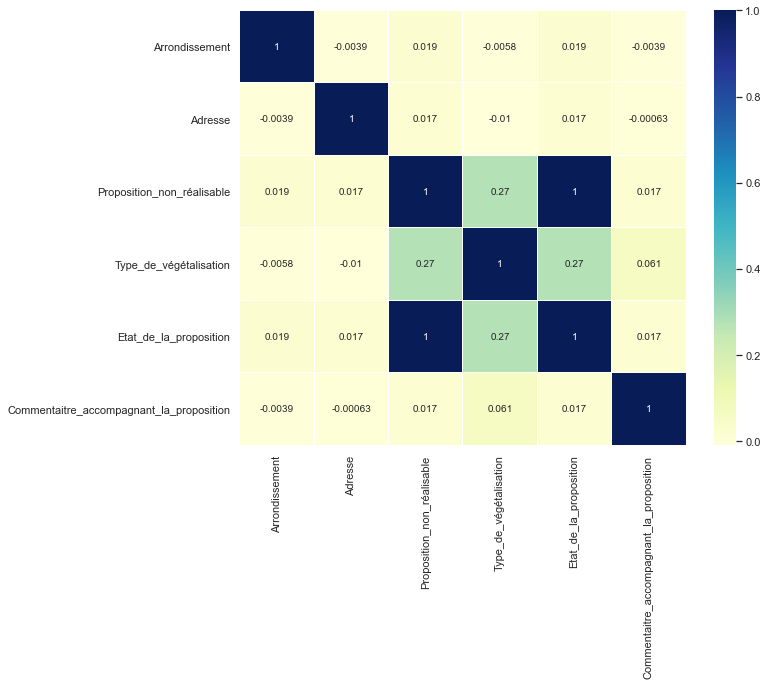

In [46]:
# correlation entre les variables
DF2Dummies = pd.get_dummies(DF2)
plt.figure(figsize=(10,8))
cor = DF2.corr()
sns.heatmap(DF2Dummies.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [47]:
#Correlation avec la variable de sortie
cor_target = abs(cor["Proposition_non_réalisable"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Proposition_non_réalisable    1.000000
Type_de_végétalisation        0.273861
Etat_de_la_proposition        1.000000
Name: Proposition_non_réalisable, dtype: float64

In [48]:
!pip install researchpy
import researchpy   # https://researchpy.readthedocs.io/

In [49]:
# boucle pour le test de Khi 2
print("H0:Les variables sont indépendantes \nH1:Les variables sont dépendantes \n\n")
for i in DF2.columns:
  if i != 'Proposition_non_réalisable' and i!='id':
    crosstab, res, exp = researchpy.crosstab(DF2[i], DF2['Proposition_non_réalisable'], test='chi-square', expected_freqs=True)
    print(f"{i} / Proposition_non_réalisable\n")
    print(f"Tableau de contingence \n{exp} \n\n {res},")
    print("\n\n\n")

H0:Les variables sont indépendantes 
H1:Les variables sont dépendantes 


Arrondissement / Proposition_non_réalisable

Tableau de contingence 
                           Proposition_non_réalisable             
Proposition_non_réalisable                          0            1
Arrondissement                                                    
0                                          496.880952  1061.119048
1                                           12.119048    25.880952 

                 Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.5573
1                    p-value =    0.4554
2               Cramer's phi =    0.0187,




Adresse / Proposition_non_réalisable

Tableau de contingence 
                           Proposition_non_réalisable             
Proposition_non_réalisable                          0            1
Adresse                                                           
0                                          508.681078  1086.318922
1                   

- Nous allons divisé cette partie en deux étapes : La premiére étape concerne la corrélation de toutes les variables entre elles. Cela nous permet de voir concrétement les coefficients de corrélation de la variable "Proposition_non_réalisable" avec toutes les autres variables. La seconde étape consiste à mettre en évidence la corrélation entre notre Target qui est "proposition non réalisation" et certaines variables explicatives à travers un tableau de contingence et un test Chi_2     

# Partie 4 : Modéle

In [50]:
from sklearn.model_selection import train_test_split
X = DF2[['Type_de_végétalisation']]
Y = DF2['Proposition_non_réalisable']

In [51]:
# Découper le dataset en : train et test 

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size =0.3)
# print the data
X_train

,Type_de_végétalisation
263,0
1168,0
1491,0
352,1
1452,0
...,...
551,0
1314,1
1250,0
405,0


In [52]:
#Entrainer le modèle de ml sur le train et test
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [53]:
clf.fit(X_train,y_train)

LinearRegression()

In [54]:
clf.predict(X_test)

array([0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 ,
       0.6201469 , 0.6201469 , 0.6201469 , 0.98780488, 0.6201469 ,
       0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 , 0.98780488,
       0.98780488, 0.98780488, 0.6201469 , 0.98780488, 0.98780488,
       0.98780488, 0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 ,
       0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 ,
       0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 ,
       0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 ,
       0.98780488, 0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 ,
       0.6201469 , 0.98780488, 0.6201469 , 0.6201469 , 0.6201469 ,
       0.98780488, 0.6201469 , 0.98780488, 0.6201469 , 0.6201469 ,
       0.6201469 , 0.6201469 , 0.98780488, 0.6201469 , 0.6201469 ,
       0.98780488, 0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 ,
       0.6201469 , 0.6201469 , 0.6201469 , 0.98780488, 0.98780488,
       0.6201469 , 0.6201469 , 0.6201469 , 0.6201469 , 0.98780

In [55]:
clf.score(X_test,y_test)

0.06732600720818482